In [1]:
import tensorflow as tf
import numpy as np
sess = tf.Session()

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

### Newton's method

Find roots with **Newton's method** for:


1) $\:f(x) = x\,cos(x) - x^2 \:\:\:  x_0 = 1$

2) $\:f(x) = x^3 - 7x^2 + 8x - 3 \:\:\: x_0 = 5 $

In [3]:
x = tf.placeholder(tf.float32, name="x")
y = x * tf.cos(x) - x**2
grad_y = tf.gradients(y, x, name="grad_y_wrt_x")

In [20]:
grad_by_hand = tf.cos(x) - x*(tf.sin(x) + 2)

In [34]:
X = np.linspace(-2, 2, 100)

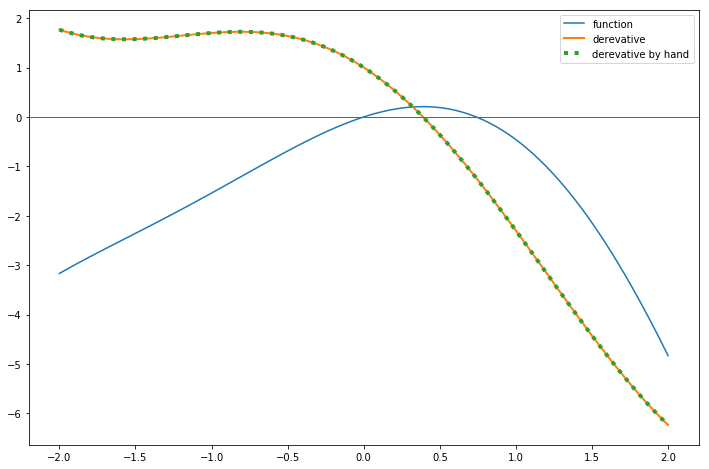

In [35]:
plt.figure(figsize=(12, 8))

plt.plot(X, sess.run(y, {x: X}), label="function")
plt.plot(X, sess.run(grad_y, {x: X})[0],lw=2, label="derevative")
plt.plot(X, sess.run(grad_by_hand, {x: X}), ":", lw=4, label="derevative by hand")
plt.axhline(y=0, linewidth=1)
plt.legend();

In [38]:
iterations = 20
xs1 = [-2]

for _ in range(iterations):
    current_x = xs1[-1]
    next_x = current_x - sess.run(y/grad_y[0], {x: current_x})
    xs1.append(next_x)
    
xs2 = [2]

for _ in range(iterations):
    current_x = xs2[-1]
    next_x = current_x - sess.run(y/grad_y[0], {x: current_x})
    xs2.append(next_x)

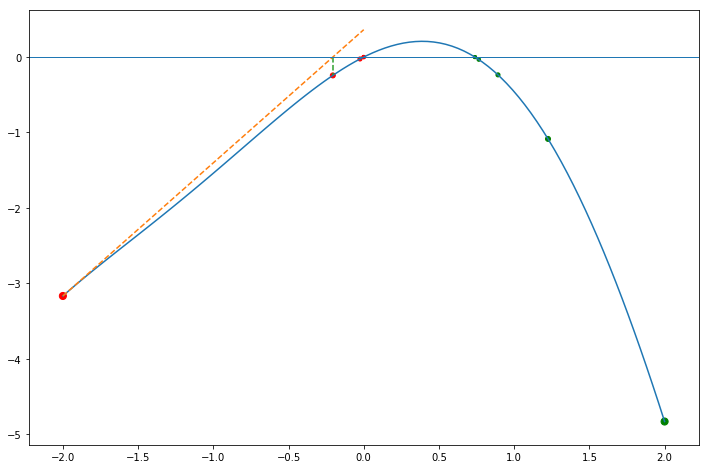

In [39]:
plt.figure(figsize=(12, 8))

plt.plot(X, sess.run(y, {x: X}), label="function")
plt.scatter(xs1, sess.run(y, {x: xs1}), s = 50/np.arange(1, 1+len(xs1)), c="red")

x0, y0, k = xs1[0], sess.run(y, {x: xs1[0]}), sess.run(grad_y[0], {x: xs1[0]})
plt.plot([x0, 0], [y0, y0 + k * (0 - x0)], "--")
plt.plot([xs1[1], xs1[1]], [0, sess.run(y, {x: xs1[1]})], "--")

plt.scatter(xs2, sess.run(y, {x: xs2}), s = 50/np.arange(1, 1+len(xs2)), c="green")

plt.axhline(y=0, linewidth=1)

In [32]:
print("root 1:", xs1[-1],"\nroot 2:", xs2[-1])

root 1: 0.0 
root 2: 0.7390851160549801


In [23]:
x = tf.placeholder(tf.float32, name="x")
y = x**3 - 7*x**2 + 8*x - 3
grad_y = tf.gradients(y, x, name="grad_y_wrt_x")

In [26]:
sess.run(grad_y, {x: 5})

[13.0]

### Softmax

$$\text{softmax}(x)_i = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$$

In [14]:
def softmax(sess, x):
    """
    param sess: tf.Session
    param x:  np.array, n-dimentional vector
    returns: np.array n-dimentional vector
    """
#     x = tf.placeholder(tf.float32, name="x")
    x_exp_sum = sum([math.exp(i) for i in x])
    print(x_exp_sum)
    
    x_p = tf.placeholder(tf.float32, name="x")
    y = tf.exp(x_p) / x_exp_sum
    Y = [y.eval({x_p: _x}) for _x in x]
    print(Y)
    return Y

In [12]:
# test
import tensorflow as tf
import numpy as np
import math

In [15]:
with tf.Session() as sess:
    if np.allclose([0.0320586, 0.08714432, 0.23688282, 0.64391426],
                   softmax(sess, np.array([1, 2, 3, 4]))):
        print("Test passed!")
    else:
        print("Test failed!")

84.7910248837216
[0.0320586, 0.08714432, 0.23688282, 0.6439142]
Test passed!


$$\text{softmax}(X)_{ij} = \frac{\exp(X_{ij})}{\sum_j \exp(X_{ij})}$$

In [31]:
def softmax_matrix(sess, x):
    """
    Computes softmax for each row vector in matrix.
    
    param sess: tf.Session
    param x:  np.array, (n x m) matrix
    returns: np.array, (n x m) matrix
    """
    <student.implement_softmax()>

In [32]:
with tf.Session() as sess:
    if np.allclose([[0.10650698, 0.78698604, 0.10650698],
                    [0.09003057, -0.24472847, 0.66524096]],
                   softmax_matrix(sess, np.array([[1,3,1], [-1, 0, 1]]))):
        print("Test passed!")
    else:
        print("Test failed!")

1
3
1
-1
0
1


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

NameError: name 'x' is not defined